In [9]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn
%matplotlib inline
%precision 3

'%.3f'

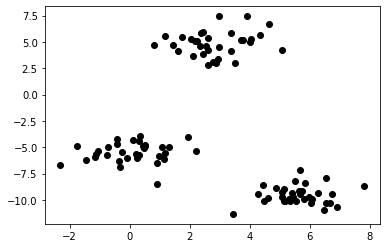

In [24]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X,_=make_blobs(random_state=10)
plt.scatter(X[:,0],X[:,1],color='black')

In [ ]:
kmeans=KMeans(init='random',n_clusters=3)
kmeans.fit(X)
y_pred=kmeans.predict(X)

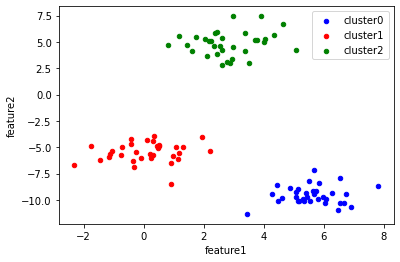

In [ ]:
merge_data=pd.concat([pd.DataFrame(X[:,0]),pd.DataFrame(X[:,1]),pd.DataFrame(y_pred)],axis=1)
merge_data.columns=['feature1','feature2','cluster',]
ax=None
colors=['blue','red','green']
for i,data in merge_data.groupby('cluster'):
    ax=data.plot.scatter(x='feature1',y='feature2',color=colors[i],label=f'cluster{i}',ax=ax)

In [25]:
import requests,zipfile
from io import StringIO
import io
url='https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'
r=requests.get(url,stream=True)
z=zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [ ]:
bank=pd.read_csv('bank-full.csv',sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
bank.shape

(45211, 17)

In [ ]:
bank.isnull().sum().sum()

0

In [ ]:
from sklearn.preprocessing import StandardScaler
bank_sub=bank[['age','balance','campaign','previous']]
sc=StandardScaler()
sc.fit(bank_sub)
bank_sub_std=sc.transform(bank_sub)
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
 3   previous  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


In [ ]:
kmeans=KMeans(init='random',n_clusters=6,random_state=0)
kmeans.fit(bank_sub_std)
labels=pd.Series(kmeans.labels_,name='cluster_number')
labels.value_counts(sort=False)

0    14411
1    23608
2     3837
3     1373
4     1282
5      700
Name: cluster_number, dtype: int64

Text(0, 0.5, 'count')

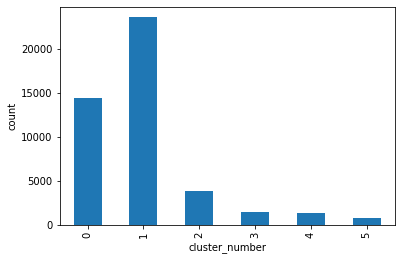

In [ ]:
ax=labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster_number')
ax.set_ylabel('count')

Text(0, 0.5, 'distortion')

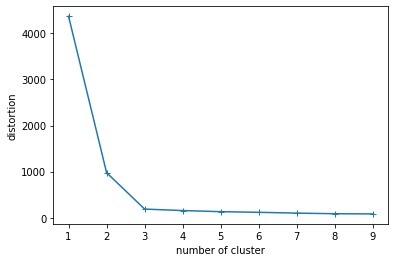

In [ ]:
dist_list=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='random',random_state=0)
    kmeans.fit(X)
    dist_list.append(kmeans.inertia_)
plt.plot(range(1,10),dist_list,marker='+')
plt.xlabel('number of cluster')
plt.ylabel('distortion')

Text(0, 0.5, 'distortion')

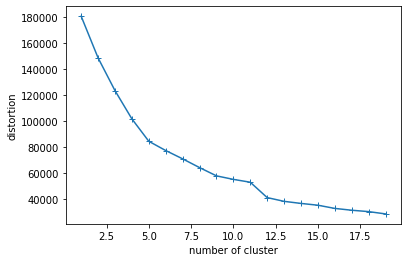

In [ ]:
dist_list=[]
for i in range(1,20):
    kmeans=KMeans(n_clusters=i,init='random',random_state=0)
    kmeans.fit( bank_sub_std)
    dist_list.append(kmeans.inertia_)
plt.plot(range(1,20),dist_list,marker='+')
plt.xlabel('number of cluster')
plt.ylabel('distortion')

In [ ]:
bank_with_cluster=pd.concat([bank,labels],axis=1)
bank_with_cluster.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster_number
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1


In [ ]:
bins=[15,20,25,30,35,40,45,50,55,60,65,100]
qcut_age=pd.cut(bank_with_cluster.age,bins,right=False)
df=pd.concat([bank_with_cluster.cluster_number,qcut_age],axis=1)
cross_cluster_age=df.groupby(['cluster_number','age']).size().unstack().fillna(0)
cross_cluster_age

age,"[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 100)"
cluster_number,,,,,,,,,,,
0,0,0,0,0,0,1023,4490,3833,3480,850,735
1,45,705,3965,8221,6731,3941,0,0,0,0,0
2,1,20,230,788,956,718,598,328,165,29,4
3,0,20,129,327,306,186,145,117,71,38,34
4,0,11,74,240,219,203,156,140,155,48,36
5,1,6,66,164,137,114,81,70,51,9,1


In [ ]:
hist_age=pd.value_counts(qcut_age)
hist_age

[30, 35)     9740
[35, 40)     8349
[40, 45)     6185
[45, 50)     5470
[50, 55)     4488
[25, 30)     4464
[55, 60)     3922
[60, 65)      974
[65, 100)     810
[20, 25)      762
[15, 20)       47
Name: age, dtype: int64

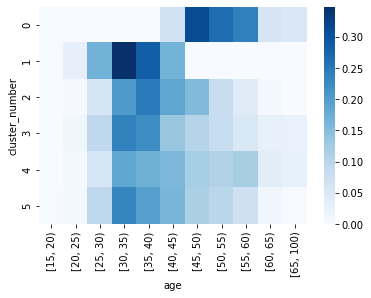

In [ ]:
sns.heatmap(cross_cluster_age.apply(lambda x : x/x.sum(),axis=1),cmap='Blues')

In [ ]:
cross_cluster_job=bank_with_cluster.groupby(['cluster_number','job']).size().unstack().fillna(0)
cross_cluster_job

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
cluster_number,,,,,,,,,,,,
0,1408,2906,530,652,2723,2006,476,1073,3,2048,432,154
1,3005,5385,697,409,4933,55,820,2474,812,4256,687,75
2,392,862,145,107,895,59,139,370,42,701,91,34
3,193,239,42,21,335,53,42,113,53,244,33,5
4,109,175,54,36,417,77,71,69,22,192,49,11
5,64,165,19,15,155,14,31,55,6,156,11,9


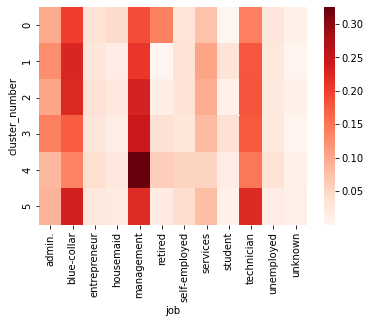

In [ ]:
sns.heatmap(cross_cluster_job.apply(lambda x:x/x.sum(),axis=1),cmap='Reds')

In [ ]:
from sklearn.preprocessing import StandardScaler
sample=np.random.RandomState(1)
X=np.dot(sample.rand(2,2),sample.randn(2,200)).T
sc=StandardScaler()
X_std=sc.fit_transform(X)
sp.stats.pearsonr(X_std[:,0],X_std[:,1])[0]

0.889

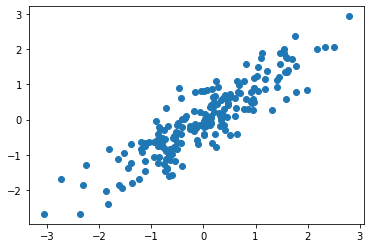

In [ ]:
plt.scatter(X_std[:,0],X_std[:,1])

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.components_

array([[-0.707, -0.707],
       [-0.707,  0.707]])

In [ ]:
pca.explained_variance_

array([1.899, 0.111])

In [ ]:
pca.explained_variance_ratio_

array([0.945, 0.055])

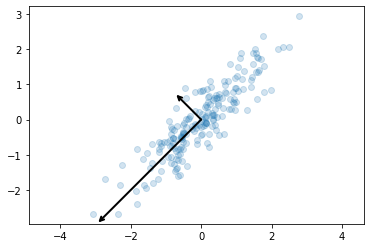

In [ ]:
arrowprops=dict(arrowstyle='->',linewidth=2,shrinkA=0,shrinkB=0)
def draw_vector(v0,v1):
    plt.gca().annotate('',v1,v0,arrowprops=arrowprops)
plt.scatter(X_std[:,0],X_std[:,1],alpha=0.2)
for length,vector in zip(pca.explained_variance_,pca.components_):
    v=vector*3*np.sqrt(length)
    draw_vector(pca.mean_,pca.mean_+v)
plt.axis('equal');

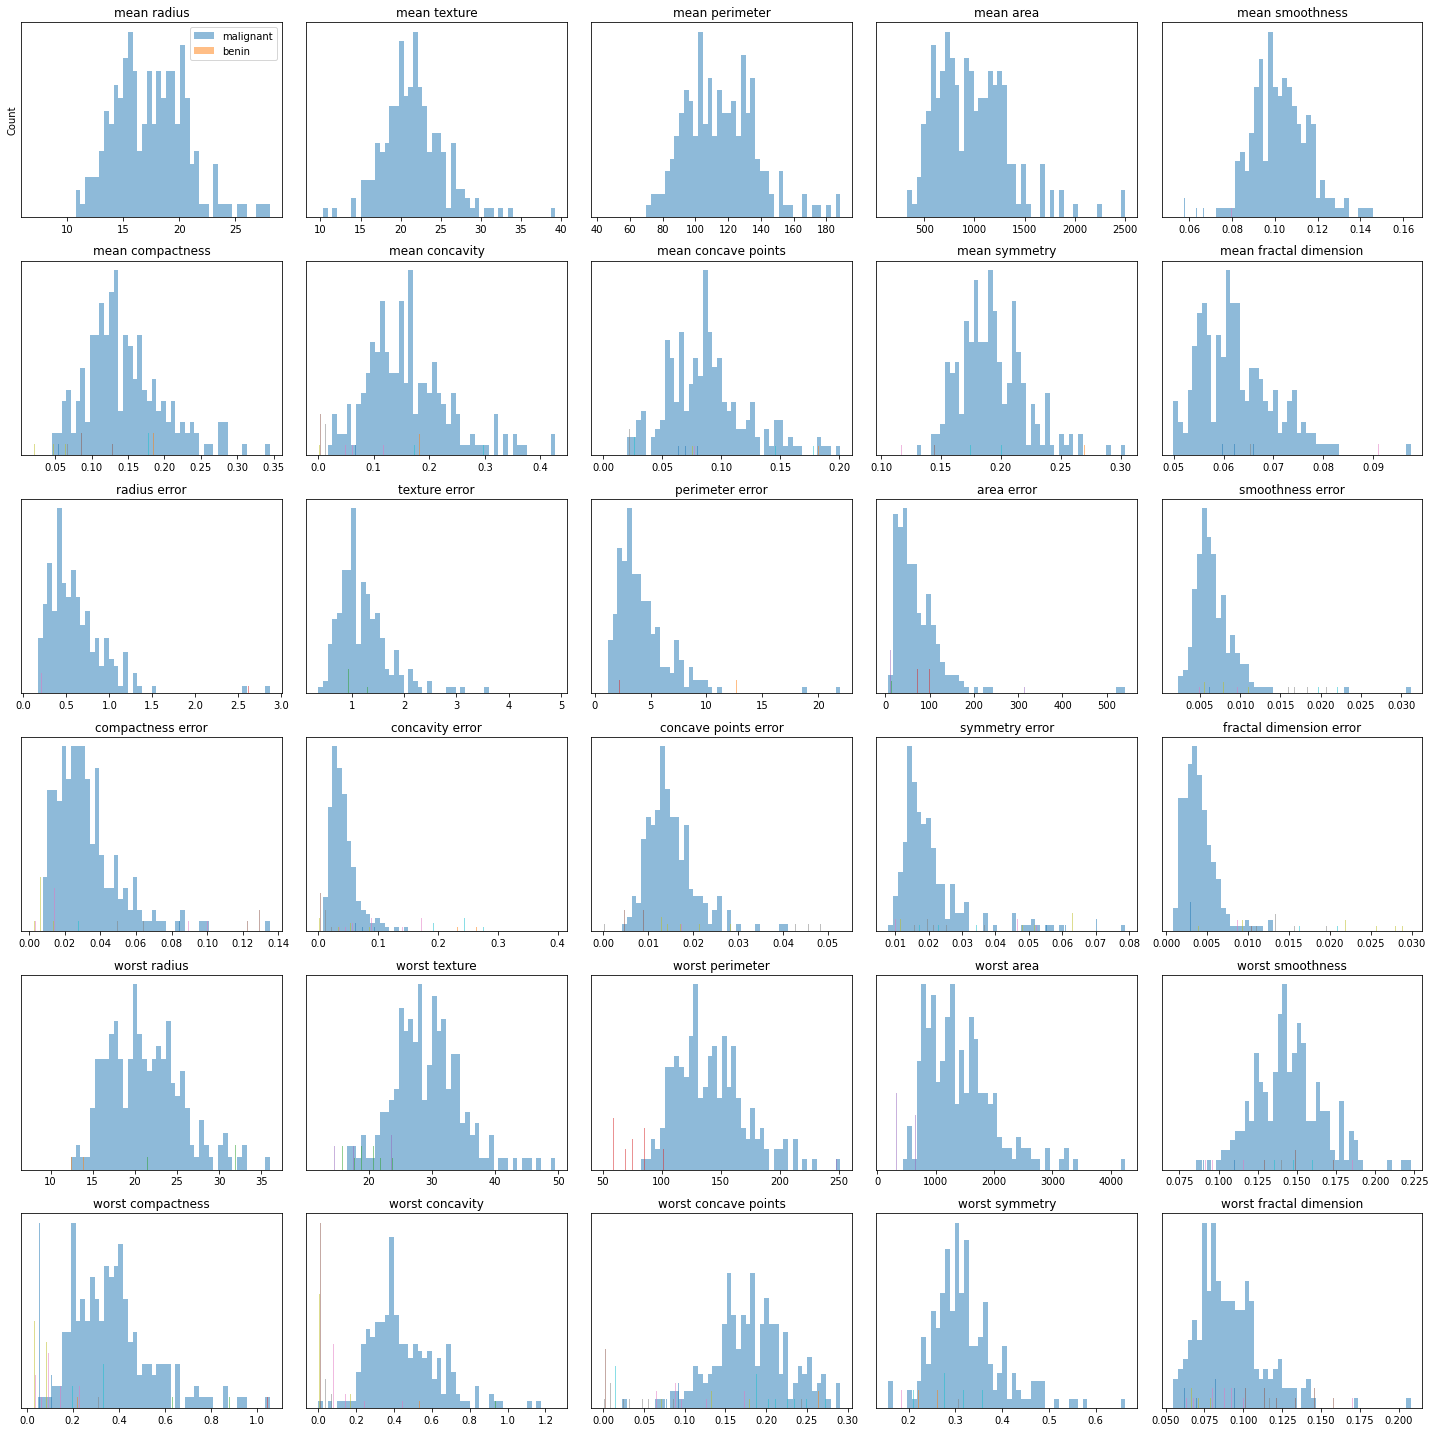

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
malignant=cancer.data[cancer.target==0]
benign=cancer.data[cancer.target==1]
fig,axes=plt.subplots(6,5,figsize=(20,20))
ax=axes.ravel()
for i in range(30):
    _,bins=np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins,alpha=.5)
    ax[i].hist(benign[:i],bins,alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_ylabel('Count')
ax[0].legend(['malignant','benin'],loc='best')
fig.tight_layout()

In [ ]:
sc=StandardScaler()
X_std=sc.fit_transform(cancer.data)
pca=PCA(n_components=2)
pca.fit(X_std)
X_pca=pca.transform(X_std)
X_pca.shape

(569, 2)

In [ ]:
pca.explained_variance_ratio_

array([0.443, 0.19 ])

In [ ]:
X_pca=pd.DataFrame(X_pca,columns=['pc1','pc2'])
X_pca=pd.concat([X_pca,pd.DataFrame(cancer.target,columns=['target'])],axis=1)
pca_malignant=X_pca[X_pca['target']==0]
pca_benign=X_pca[X_pca['target']==1]

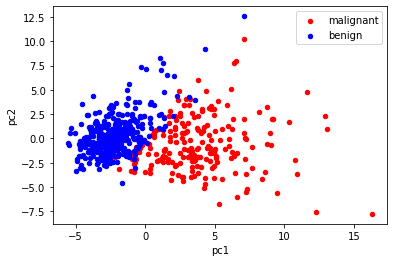

In [ ]:
ax=pca_malignant.plot.scatter(x='pc1',y='pc2',color='red',label='malignant');
pca_benign.plot.scatter(x='pc1',y='pc2',color='blue',label='benign',ax=ax);

In [36]:
ls

bank.csv  bank-full.csv  bank-names.txt  drive/  sample_data/


In [37]:
pip install xlrd

In [38]:
trans=pd.read_excel('Online Retail.xlsx',sheet_name='Online Retail')
trans.head()

FileNotFoundError: ignored

In [ ]:
trans['cancel_flg']=trans.InvoiceNo.map(lambda x:str(x)[0])
trans.groupby('cancel_flg').size()

cancel_flg
5    532618
A         3
C      9288
dtype: int64

In [ ]:
trans=trans[(trans.cancel_flg=='5')&(trans.CustomerID.notnull())]

In [ ]:
trans['StockCode'].value_counts().head(5)

85123A    2035
22423     1724
85099B    1618
84879     1408
47566     1397
Name: StockCode, dtype: int64

In [ ]:
trans_all=set(trans.InvoiceNo)
trans_a=set(trans[trans['StockCode']=='85123A'].InvoiceNo)
len(trans_a)

1978

In [ ]:
trans_b=set(trans[trans['StockCode']=='85099B'].InvoiceNo)
len(trans_b)

1600

In [ ]:
trans_ab=trans_a&trans_b
len(trans_ab)

252

両商品を含むバスケットの全体に占める割合

In [ ]:
len(trans_ab)/len(trans_all)

0.014

商品85123Aを含むバスケットの全体に占める割合

In [ ]:
len(trans_a)/len(trans_all)

0.107

確信度

In [ ]:
len(trans_ab)/len(trans_a)

0.127

In [ ]:
len(trans_ab)/len(trans_b)

0.158

In [ ]:
support_b=len(trans_b)/len(trans_all)
confidence=len(trans_ab)/len(trans_a)
lift=confidence/support_b
lift

1.476

# 総合問題